# Install the necessary Packages

In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


from sklearn.metrics import confusion_matrix, f1_score,precision_score, recall_score, accuracy_score,classification_report



In [112]:
df = pd.read_csv('final_data.csv')

In [113]:
df.head()

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0


In [114]:
df.activity.value_counts()

activity
0    787
3    613
2    603
1    572
5    552
4    529
Name: count, dtype: int64

In [115]:
X = df.drop('activity', axis =1)
y = df['activity']

In [116]:
import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler


# Print the class distribution before oversampling
print("Before oversampling:", Counter(y))

# Create the oversampler
oversampler = RandomOverSampler(random_state=1)

# Oversample the minority classes
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the class distribution after oversampling
print("After oversampling:", Counter(y_resampled))


Before oversampling: Counter({0: 787, 3: 613, 2: 603, 1: 572, 5: 552, 4: 529})
After oversampling: Counter({0: 787, 5: 787, 4: 787, 1: 787, 2: 787, 3: 787})


In [117]:
df.activity.value_counts()

activity
0    787
3    613
2    603
1    572
5    552
4    529
Name: count, dtype: int64

In [118]:
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['activity'])], axis=1)

In [119]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4722 non-null   int64  
 1   gender                4722 non-null   int64  
 2   height                4722 non-null   float64
 3   weight                4722 non-null   float64
 4   steps                 4722 non-null   float64
 5   hear_rate             4722 non-null   float64
 6   calories              4722 non-null   float64
 7   distance              4722 non-null   float64
 8   entropy_heart         4722 non-null   float64
 9   entropy_setps         4722 non-null   float64
 10  resting_heart         4722 non-null   float64
 11  corr_heart_steps      4722 non-null   float64
 12  norm_heart            4722 non-null   float64
 13  intensity_karvonen    4722 non-null   float64
 14  sd_norm_heart         4722 non-null   float64
 15  steps_times_distance 

# Performance Metrics

In this analysis, we are trying to predict whether the Apple watch is able to correctly predict the physical activity. 

The physical activity predicted by the Apple watch is used to recommend the watch users a set of activities to improve their health.
Though this is a multi-class problem, for finalizing the performance criteria, we can consider 
the problem as binary with two broad categories- "Sedentary" or "Not sedentary".


**Assumption**:
    
Based on the classification of physical activity, the watch will recommend a set of actions/exercises for the watch user. 
    
Whether the person follows these actions is a different case altogether. For our case, we are
assuming that all users follows the recommended actions by Apple watch.


**Case-1**

Let's say the user is a "sedentary person". 
If the watch classifies this person's activities as "Not sedentary", then the watch may not 
recommend the user any exercise.

In this case, since there are no exercise recommendations for the sedentary person, the person will not exercise and this is detrimental for his/her health.

**Case-2**

Let's say, the user is "not sedentary"- physically active
If the watch does not classify this person's physical activities as "sedentary", the watch may 
recommend the user to stretch more than that is unnecessary.

In this case too, the recommended actions may be detrimental for his/her health due to overstretching.

**Conlusion**

So, from the above cases, we can conclude that False Positives and False Negatives are equally expensive in this problem.

Hence, F1 Score (macro-average) is the best performance metric.

# Train test split

In [120]:
train_df, test_df = train_test_split(df_resampled, train_size=0.7, random_state=99) # Considering 70% of the dataset as Training set

In [121]:
X_train = train_df.drop(columns=['activity'])
y_train = train_df['activity']
X_test = test_df.drop(columns=['activity'])
y_test = test_df['activity']

# Building Models

In [122]:
train_df.shape

(3305, 17)

In [123]:
# Creating a dartaframe to hold the performance results of all the models 

## Keras Neural Network without Hyperparameter tuning

In [124]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [125]:
#os.environ['TF_CPP_MIN_LOG_LEVEL']='3' is a statement in Python code that sets the value of an environment variable named TF_CPP_MIN_LOG_LEVEL to the string '3'. 
# This environment variable is used by TensorFlow to control the verbosity of its logging output.

# When TF_CPP_MIN_LOG_LEVEL is set to '0', TensorFlow logs all messages, including debug messages. 
# When it is set to '1', TensorFlow suppresses debug messages but still logs other messages, such as warnings and errors. 
# When it is set to '2', TensorFlow only logs errors, and when it is set to '3', TensorFlow logs no messages except for fatal errors.


In [126]:
from __future__ import print_function
import numpy as np
from tensorflow import keras


np.random.seed(1)
tf.random.set_seed(1)

In [127]:
%%time

model = keras.models.Sequential()
model.add(keras.layers.Input(16))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(6, activation = 'softmax'))  # final layer has 6 categories




CPU times: user 70.5 ms, sys: 2.33 ms, total: 72.8 ms
Wall time: 71.9 ms


In [128]:
from keras import backend as K

def recall(y_true,y_pred):
    y_true= K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0,1)))
    possible_positves = K.sum(K.round(K.clip(y_true, 0,1)))
    recall_keras = true_positives / (possible_positves + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    y_true = K.ones_like(y_true)
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))


def fbeta(y_true, y_pred, beta=2):
    y_pred = K.clip(y_pred, 0, 1)

    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    num = (1 + beta ** 2) * (p * r)
    den = (beta ** 2 * p + r + K.epsilon())
    return K.mean(num / den)



In [129]:
import tensorflow_addons as tfa

In [130]:
#from sklearn.metrics import f1_score
#import keras.backend as K

#def f1_micro(y_test, y_pred):
    #return f1_score(y_test, y_pred, average='micro')



model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=[                              
                      tfa.metrics.F1Score(num_classes=6, 
                      average='micro',
                      threshold=0.5)])


In [131]:
%%time

#fit the model

history = model.fit(X_train, y_train, validation_data= (X_test,y_test), epochs= 20, batch_size= 32)


# An epoch is one complete pass through the entire training dataset during the training process. 
# In other words, an epoch is a measure of the number of times the model has seen the entire training dataset. 
# During each epoch, the model makes predictions on the training data, computes the loss function, and updates the weights of the 
# neural network using an optimization algorithm such as stochastic gradient descent (SGD)


# A batch is a subset of the training dataset that is used to compute the loss function and 
# update the weights of the neural network during each epoch. The size of the batch is a hyperparameter that 
# determines the number of examples that the model processes at a time. The size of the batch is usually 
# chosen to balance the trade-off between computational efficiency and the stability of the training process. 
# A common choice for the batch size is 32, 64, or 128.

Epoch 1/20
104/104 [==============================] - 1s 6ms/step - loss: 5.0394 - f1_score: 0.2093 - val_loss: 2.2359 - val_f1_score: 0.1309
Epoch 2/20
104/104 [==============================] - 0s 2ms/step - loss: 2.0527 - f1_score: 0.1263 - val_loss: 2.0417 - val_f1_score: 0.1364
Epoch 3/20
104/104 [==============================] - 0s 2ms/step - loss: 1.9717 - f1_score: 0.1386 - val_loss: 2.1267 - val_f1_score: 0.1052
Epoch 4/20
104/104 [==============================] - 0s 2ms/step - loss: 1.9104 - f1_score: 0.1244 - val_loss: 1.9651 - val_f1_score: 0.1000
Epoch 5/20
104/104 [==============================] - 0s 2ms/step - loss: 1.7758 - f1_score: 0.1129 - val_loss: 1.7248 - val_f1_score: 0.1137
Epoch 6/20
104/104 [==============================] - 0s 2ms/step - loss: 1.7539 - f1_score: 0.1153 - val_loss: 1.7625 - val_f1_score: 0.0948
Epoch 7/20
104/104 [==============================] - 0s 2ms/step - loss: 1.7194 - f1_score: 0.1045 - val_loss: 1.7939 - val_f1_score: 0.1032
Epoch 

In [132]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[1.3248116970062256, 0.1193653792142868]

In [133]:
print("%s: %.2f" % (model.metrics_names[0],scores[0]))
print("%s: %.2f%%"% (model.metrics_names[1],scores[1]*100))

loss: 1.32
f1_score: 11.94%


## Hyper parameter tuning of Keras NN with scikit learn

In [134]:
%%time

def build_clf(meta, hidden_layer_sizes,dropout):
    n_features_in_ = meta["n_features_in_"]
    n_classes_ = meta["n_classes_"]
    target_encoder_ = meta["target_encoder_"]

    model2 = tf.keras.Sequential()
    model2.add(keras.layers.Input(shape= n_features_in_))
    for hidden_layer_size in hidden_layer_sizes:
        model2.add(keras.layers.Dense(hidden_layer_size,
            kernel_initializer = tf.keras.initializers.GlorotUniform(),
            bias_initializer = keras.initializers.RandomNormal(mean= 0.0, stddev = 0.05, seed = None),
            activation = "relu"))
        model2.add(keras.layers.Dropout(dropout))
    model2.add(tf.keras.layers.Dense(6, activation = 'softmax'))

    return model2

    

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10 µs


In [135]:
from scikeras.wrappers import KerasClassifier

keras_clf = KerasClassifier(
    model= build_clf,
    hidden_layer_sizes = 16,
    dropout = 0.5,
    optimizer = keras.optimizers.Adam,
    optimizer__learning_rate = 0.0001
)

keras_clf.get_params()

{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 16,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [136]:
params = {

    'model__hidden_layer_sizes' : [(50,), (100) ,(100, 100), (100,100,100), (100, 50, 30), (300, 200, 100, 50, 20)],
    'model__dropout' : [0,0.1],

    # fit params
    'batch_size' : [20,30],
    'epochs' : [10,20],
    'optimizer' : ['adam','sgd'],
    'loss': ['sparse_categorical_crossentropy'],

    #optimizer params
    'optimizer__learning_rate' : [0.0001,0.001,0.01]
    
}

keras_clf.get_params()

{'model': <function __main__.build_clf(meta, hidden_layer_sizes, dropout)>,
 'build_fn': None,
 'warm_start': False,
 'random_state': None,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'loss': None,
 'metrics': None,
 'batch_size': None,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.0,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 1,
 'hidden_layer_sizes': 16,
 'dropout': 0.5,
 'optimizer__learning_rate': 0.0001,
 'class_weight': None}

In [137]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rand_search = RandomizedSearchCV(
    estimator = keras_clf,
    param_distributions = params,
    scoring = 'f1_micro',
    n_iter = 300,
    cv =3
)


_ = rand_search.fit(X_train,y_train, verbose=1 )

/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 288 is smaller than n_iter=300. Running 288 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Epoch 1/10
111/111 [==============================] - 1s 1ms/step - loss: 53.1664
Epoch 2/10
111/111 [==============================] - 0s 1ms/step - loss: 29.0961
Epoch 3/10
111/111 [==============================] - 0s 1ms/step - loss: 18.5868
Epoch 4/10
111/111 [==============================] - 0s 1ms/step - loss: 14.1939
Epoch 5/10
111/111 [==============================] - 0s 1ms/step - loss: 11.7308
Epoch 6/10
111/111 [==============================] - 0s 1ms/step - loss: 9.8740
Epoch 7/10
111/111 [==============================] - 0s 2ms/step - loss: 8.4203
Epoch 8/10
111/111 [==============================] - 0s 1ms/step - loss: 7.1332
Epoch 9/10
111/111 [==============================] - 0s 1ms/step - loss: 6.2001
Epoch 10/10
56/56 [==============================] - 0s 1ms/step
Epoch 1/10
111/111 [==============================] - 0s 1ms/step - loss: 73.0509
Epoch 2/10
111/111 [==============================] - 0s 1ms/step - loss: 47.0008
Epoch 3/10
111/111 [=================

/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
144 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/scikera

Epoch 1/20
166/166 [==============================] - 10s 23ms/step - loss: 3.5564
Epoch 2/20
166/166 [==============================] - 3s 21ms/step - loss: 2.0641
Epoch 3/20
166/166 [==============================] - 3s 21ms/step - loss: 1.8996
Epoch 4/20
166/166 [==============================] - 3s 17ms/step - loss: 1.7563
Epoch 5/20
166/166 [==============================] - 2s 15ms/step - loss: 1.6224
Epoch 6/20
166/166 [==============================] - 4s 21ms/step - loss: 1.6314
Epoch 7/20
166/166 [==============================] - 4s 22ms/step - loss: 1.4995
Epoch 8/20
166/166 [==============================] - 3s 18ms/step - loss: 1.4527
Epoch 9/20
166/166 [==============================] - 3s 16ms/step - loss: 1.4386
Epoch 10/20
166/166 [==============================] - 3s 20ms/step - loss: 1.4235
Epoch 11/20
166/166 [==============================] - 3s 16ms/step - loss: 1.3637
Epoch 12/20
166/166 [==============================] - 3s 20ms/step - loss: 1.3335
Epoch 13/20


In [138]:
rand_search.best_params_

{'optimizer__learning_rate': 0.001,
 'optimizer': 'adam',
 'model__hidden_layer_sizes': (100, 100, 100),
 'model__dropout': 0,
 'loss': 'sparse_categorical_crossentropy',
 'epochs': 20,
 'batch_size': 20}

In [139]:
best_model = rand_search.best_estimator_

In [140]:
%%time
print(f"best score {best_model.score(X_test,y_test)}")
print(f"min loss {min(best_model.history_['loss'])}")

71/71 [==============================] - 1s 5ms/step
best score 0.5243472124206069
min loss 1.1351802349090576
CPU times: user 823 ms, sys: 164 ms, total: 987 ms
Wall time: 1.19 s


In [141]:
best_model.history_

defaultdict(list,
            {'loss': [3.5563747882843018,
              2.0641021728515625,
              1.8995938301086426,
              1.756273627281189,
              1.6224355697631836,
              1.6314406394958496,
              1.4995042085647583,
              1.4527026414871216,
              1.4386277198791504,
              1.423450231552124,
              1.3637288808822632,
              1.3334627151489258,
              1.3122519254684448,
              1.2498950958251953,
              1.2623450756072998,
              1.2200011014938354,
              1.2210164070129395,
              1.1899590492248535,
              1.1701815128326416,
              1.1351802349090576]})

71/71 [==============================] - 0s 5ms/step


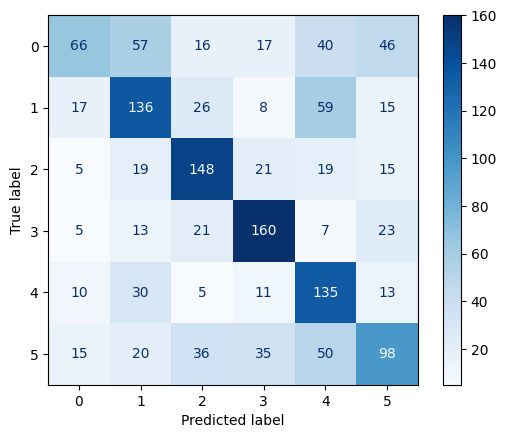

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test,best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = plt.cm.Blues)
plt.show()

In [143]:
from sklearn.metrics import classification_report

print(classification_report(y_test,best_model.predict(X_test), digits = 4))

71/71 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0     0.5593    0.2727    0.3667       242
           1     0.4945    0.5211    0.5075       261
           2     0.5873    0.6520    0.6180       227
           3     0.6349    0.6987    0.6653       229
           4     0.4355    0.6618    0.5253       204
           5     0.4667    0.3858    0.4224       254

    accuracy                         0.5243      1417
   macro avg     0.5297    0.5320    0.5175      1417
weighted avg     0.5297    0.5243    0.5139      1417



In [160]:
best_keras_model = rand_search.best_estimator_.model


## Hyperparameter tuning of Scikit learn Neural Network-MLP classifier 

### Random Search- MLP classifer

In [166]:
from sklearn.neural_network import MLPClassifier

In [168]:
%%time

score_measure = "f1_micro"
kfolds = 3

param_grid = {
    'hidden_layer_sizes': [(100,100,100), (100,100,100,100), (100,100,100,100,100)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1, 0.2, 1,10],
    'max_iter': [5000]
}


ann = MLPClassifier()
random_search = RandomizedSearchCV(estimator = ann, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = random_search.fit(X_train, y_train)

best_ann = random_search.best_estimator_

print(random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/harsha/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.

{'solver': 'adam', 'max_iter': 5000, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100, 100, 100, 100), 'alpha': 0.001, 'activation': 'relu'}
CPU times: user 45.9 s, sys: 1.91 s, total: 47.8 s
Wall time: 16min 36s


### Grid Search- MLP classifier

In [169]:
y_pred = best_ann.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       242
           1       0.80      0.79      0.79       261
           2       0.87      0.71      0.78       227
           3       0.76      0.91      0.83       229
           4       0.76      0.85      0.80       204
           5       0.76      0.70      0.73       254

    accuracy                           0.75      1417
   macro avg       0.75      0.75      0.75      1417
weighted avg       0.75      0.75      0.75      1417



In [178]:
%%time

score_measure = "f1_micro"
kfolds = 2

param_grid = {
    'hidden_layer_sizes': [(100,100,100,100,100,100,100), (100,100,100,100,100,100,100,100), (150,150,150,150,150,150,150,150) ],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.001,0.002,0.003],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.001, 0.002, 0.005],
    'max_iter': [5000]
}

ann = MLPClassifier()
grid_search = GridSearchCV(estimator = ann, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

best_grid = grid_search.best_estimator_

print(grid_search.best_params_)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.001, 'max_iter': 5000, 'solver': 'adam'}
CPU times: user 52 s, sys: 1.1 s, total: 53.1 s
Wall time: 2min 6s


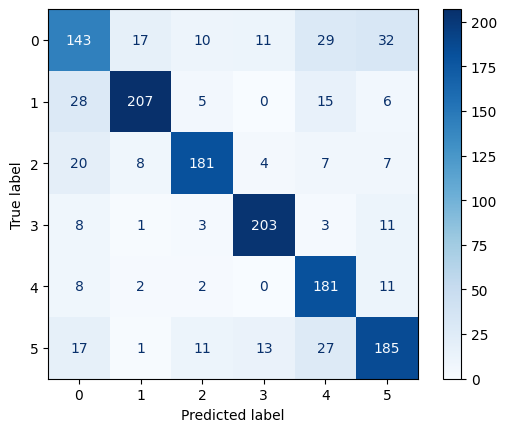

In [183]:
cm = confusion_matrix(y_test,best_grid.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = plt.cm.Blues)
plt.show()

In [179]:
y_pred = best_grid.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.59      0.61       242
           1       0.88      0.79      0.83       261
           2       0.85      0.80      0.82       227
           3       0.88      0.89      0.88       229
           4       0.69      0.89      0.78       204
           5       0.73      0.73      0.73       254

    accuracy                           0.78      1417
   macro avg       0.78      0.78      0.78      1417
weighted avg       0.78      0.78      0.78      1417



# Conclusion




From the results, the following are the performance scores of the models on the test data:

| **Model** | **F1-Macro** |
| :---: | :---: |
| Keras NN | 12% |
| Keras NN with Hyperparameter Tuning | 52% |
| Scikit learn MLP Classifier with Random Search | 75%  |
| Scikit learn MLP Classifier with Grid Search | 78% |



Clearly, with the available computing resources, Sci-kit learn- "MLP classifer with Grid Search" performed better than the other models.
Even when compared to other models, in the previous assignment, MLP classifier with Grid Search is the best performing model. Perhaps, given more computing time, we can further fine-tune the model and get better performance.

